In [ ]:
# Importing all the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, UpSampling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

The CIFAR 100 dataset consists of 60000 32x32 colour images of 100 classes. Each class contains 600 images. The size of the training set and of the testing set is 50000 and 10000 images respectively.

In [ ]:
# Importing the cifar100 dataset and spliting into train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Making sure that the size of the training and testing sets are as mentioned before
# if the shape does not match, then an error should raise
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [ ]:
print("Train Images shape: ",x_train.shape)
print("Test Images shape: ",x_test.shape)

Train Images shape:  (50000, 32, 32, 3)
Test Images shape:  (10000, 32, 32, 3)


In [ ]:
# This function takes as input a set of images and preprocess it
def preprocess_images(images):
    # check if the shape of the input image is 2D, and if so, assign it to `sample_img`
    sample_img = images if len(images.shape) == 2 else images[0]
    # assert that the shape of the image is 28x28 and single-channel (grayscale)
    assert sample_img.shape in [(32, 32, 3), (32, 32)], sample_img.shape
    # normalize the image by dividing each pixel by 255.0
    return images / 255.0

# preprocess the train images
images_train = preprocess_images(x_train)

# preprocess the test images
images_test = preprocess_images(x_test)

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


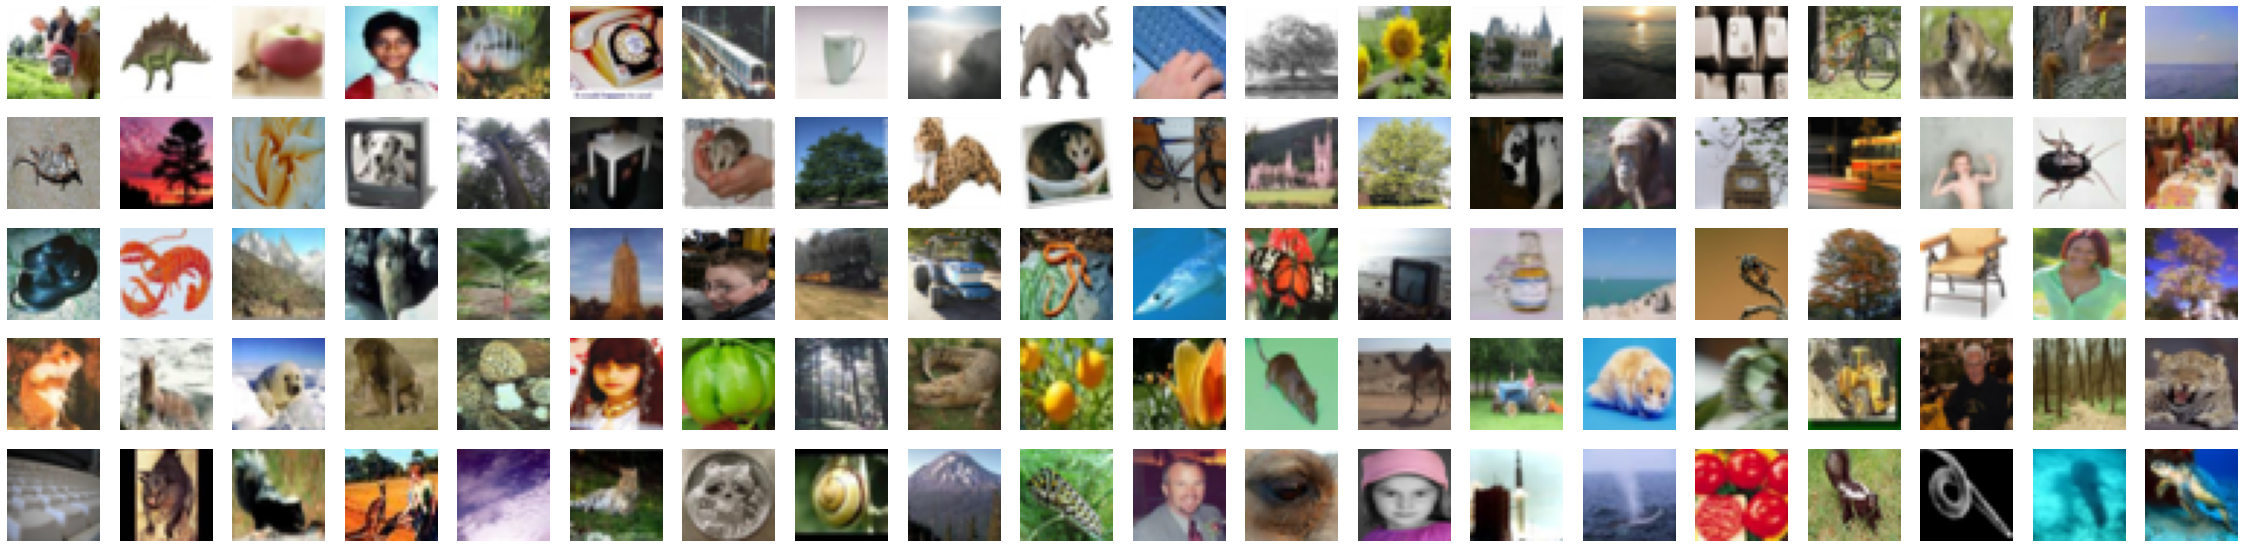

In [ ]:
plt.figure(figsize = (40,20))
for i in range(100):
  plt.subplot(10,20,1+i)
  plt.axis('off')
  plt.imshow(images_train[i], cmap = 'gray')
  plt.xlabel(y_train[i])

In [ ]:
y_train[0]

array([19])

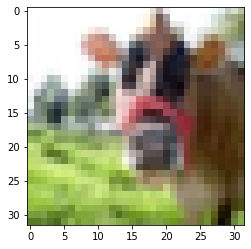

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# create a sequential model
model = keras.Sequential()

# add a 2D convolution layer with 32 filters of size 3x3 and relu activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# add a 2D convolution layer with 64 filters of size 3x3 and relu activation
model.add(Conv2D(128, (3, 3), activation='relu'))
# add a 2D pooling layer to choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# add a dropout layer to randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten the data since too many dimensions, we only want a classification output
model.add(Flatten())
# add a fully connected layer with 128 neurons and relu activation
model.add(Dense(256, activation='relu'))
# add a dropout layer to randomly turn neurons on and off to improve convergence
model.add(Dropout(0.5))
# add a final output layer with 10 neurons and softmax activation
model.add(Dense(10, activation='softmax'))

# print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                        

In [ ]:
# Compiling the model using sparse_categorical_crossentropy as the loss function,
# the Adam optimizer with a learning rate of 0.001 and accuracy as the metric to track.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['accuracy'])

# Fitting the model to the training data, using a batch size of 128 and 15 epochs.
# Also, validation data is passed as (images_test, labels_test) to calculate validation loss and accuracy.
history = model.fit(x_train, y_train,
                    batch_size=400,
                    epochs=15,
                    validation_data=(x_test, y_test))

# Create a DataFrame from the history of the training and store the epoch values.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Finally, display the hist DataFrame.
hist


Epoch 1/15
125/125 [==============================] - 9s 54ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 2/15
125/125 [==============================] - 7s 54ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 3/15
125/125 [==============================] - 7s 56ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 4/15
125/125 [==============================] - 7s 55ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 5/15
125/125 [==============================] - 7s 55ms/step - loss: nan - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0100
Epoch 6/15
 54/125 [===========>..................] - ETA: 3s - loss: nan - accuracy: 0.0091

KeyboardInterrupt: ignored

###Transfer Learning VGG16

In [ ]:
# Import the VGG16 model from the Keras Applications module
from keras.applications.vgg16 import VGG16

# Instantiating the VGG16 model with pre-trained weights on ImageNet dataset
vgg16 = VGG16(weights='imagenet',
              # exclude the fully connected layers at the top of the network
              include_top=False,
              # specify the input shape of the images, in this case 32x32 pixels with 3 color channels
              input_shape=(32, 32, 3))

# Print a summary of the model architecture
vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:

# Creating an input layer with shape (32, 32, 3) which represents the shape of the input image
inputs = Input(shape=(32, 32, 3))

# Applying the VGG16 model to the inputs and storing the output in the variable 'x'
x = vgg16(inputs)

# Flattening the output of the previous layer 'x'
#x = Flatten()(x)

# Adding a dense layer with 256 neurons and 'relu' activation function
#x = Dense(256, activation='relu')(x)

# Adding the final layer with 10 neurons and 'softmax' activation function for the classification of 100 classes
predictions = Dense(100, activation='softmax')(x)

flatten_layer = layers.Flatten()
dense_layer1 = layers.Dense(256, activation='relu')
dense_layer2 = layers.Dense(256, activation='relu')
dense_layer3 = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(100, activation="softmax")
# Creating a Model with the input layer 'inputs' and the output layer 'predictions'
model_new = models.Sequential([inputs, vgg16, flatten_layer, dense_layer1, dense_layer2, dense_layer3, prediction_layer])
#model_new2 = Model(inputs=inputs, outputs=predictions)

model_new.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 100)               25700     
                                                                 
Total params: 15,003,300
Trainable params: 15,003,300


In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-5]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-5:]):
    layer.trainable = True

In [ ]:
datagen = ImageDataGenerator(
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

datagen.fit(images_train)

In [ ]:
# compile the model without data augmentation
model_new.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

print("Train Images shape: ",x_train.shape)
print("Test Images shape: ",x_test.shape)
print(y_train.shape)
print(y_test.shape)

history = model_new.fit(images_train, y_train,
                    batch_size=50,
                    epochs=50,
                    validation_data=(images_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)])

# Create a DataFrame from the history of the training
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist


Train Images shape:  (50000, 32, 32, 3)
Test Images shape:  (10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Epoch 1/50
1000/1000 [==============================] - 16s 14ms/step - loss: 2.0147 - accuracy: 0.4562 - val_loss: 2.7802 - val_accuracy: 0.3386
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 1.7203 - accuracy: 0.5197 - val_loss: 2.8209 - val_accuracy: 0.3512
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 1.5217 - accuracy: 0.5667 - val_loss: 2.9301 - val_accuracy: 0.3462
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 1.3580 - accuracy: 0.6088 - val_loss: 3.0925 - val_accuracy: 0.3478
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.2213 - accuracy: 0.6464 - val_loss: 3.2728 - val_accuracy: 0.3413
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 1.0970 - accuracy: 0.6759 - val_loss: 3.4244 - val_accuracy: 0.3410
Epoch 7/50
1000/1000 [=

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.014685,0.45618,2.780198,0.3386,0
1,1.720302,0.51974,2.820903,0.3512,1
2,1.521669,0.56670,2.930097,0.3462,2
3,1.358012,0.60882,3.092473,0.3478,3
4,1.221302,0.64640,3.272850,0.3413,4
5,1.097027,0.67594,3.424433,0.3410,5
6,0.984655,0.70820,3.627273,0.3408,6
7,0.887582,0.73590,3.809682,0.3313,7
8,0.808588,0.75658,4.079991,0.3309,8
9,0.736445,0.77510,4.270350,0.3245,9


In [ ]:
# compiling the model using data augmentation
print("Train Images shape: ",x_train.shape)
print("Test Images shape: ",x_test.shape)
print(y_train.shape)
print(y_test.shape)

history2 = model_new.fit(datagen.flow(images_train, y_train,
                    batch_size=50),
                    epochs=50,
                    validation_data=(images_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)])

# Create a DataFrame from the history of the training
hist2 = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

hist


Train Images shape:  (50000, 32, 32, 3)
Test Images shape:  (10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Epoch 1/50
1000/1000 [==============================] - 40s 39ms/step - loss: 3.0859 - accuracy: 0.2634 - val_loss: 3.1001 - val_accuracy: 0.2892
Epoch 2/50
1000/1000 [==============================] - 39s 39ms/step - loss: 2.8631 - accuracy: 0.2925 - val_loss: 2.9381 - val_accuracy: 0.3076
Epoch 3/50
1000/1000 [==============================] - 40s 40ms/step - loss: 2.8065 - accuracy: 0.2984 - val_loss: 2.9727 - val_accuracy: 0.2987
Epoch 4/50
1000/1000 [==============================] - 40s 40ms/step - loss: 2.7700 - accuracy: 0.3062 - val_loss: 2.9157 - val_accuracy: 0.3099
Epoch 5/50
1000/1000 [==============================] - 39s 39ms/step - loss: 2.7327 - accuracy: 0.3109 - val_loss: 2.8867 - val_accuracy: 0.3109
Epoch 6/50
1000/1000 [==============================] - 39s 39ms/step - loss: 2.7212 - accuracy: 0.3158 - val_loss: 2.9069 - val_accuracy: 0.3117
Epoch 7/50
1000/1000 [=

KeyboardInterrupt: ignored

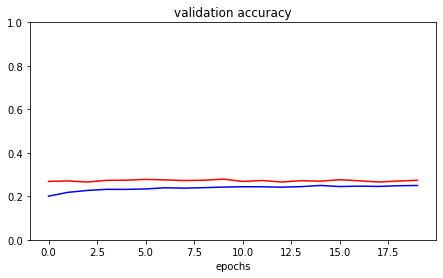

In [ ]:
fig = plt.figure(figsize=(16,4))


ax2 = fig.add_subplot(122)

ax2.plot(history2.history["accuracy"], color='b')
ax2.plot(history2.history["val_accuracy"], color='r')
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

###Transfer Learning with ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    classes=100)

resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Creating a neural network with transfer learning
model_rn = tf.keras.Sequential()
# Since our dataset consists of images of 32x32 size and the ResNet50 model takes 224x224 images as input,
# we need to resize the images to match the requirement. Multiplying each dimension with 7 solves this issue.
model_rn.add(UpSampling2D(size=(7,7)))
model_rn.add(resnet50)
model_rn.add(AveragePooling2D(pool_size=7))
model_rn.add(Flatten())
# Adding the output layer which
model_rn.add(Dense(100, activation=('softmax')))

earlystop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
checkpoint = ModelCheckpoint(filepath='cifar100.h1', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model_rn.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model_rn.fit(images_train, y_train,
             batch_size=200,
             epochs=10,
             validation_data=(images_test, y_test),
             verbose=1,
             callbacks=[checkpoint, earlystop])

model_rn.save('cifar100.h1')


Epoch 1/10
